# Exploratory Data Analysis

## Imports

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import ast

## Load the Data

In [93]:
listings = pd.read_csv('../listings_cleaned.csv')

In [94]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9277 entries, 0 to 9276
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9277 non-null   int64  
 1   listing_url                                   9277 non-null   object 
 2   name                                          9277 non-null   object 
 3   description                                   9116 non-null   object 
 4   neighborhood_overview                         6648 non-null   object 
 5   picture_url                                   9277 non-null   object 
 6   host_id                                       9277 non-null   int64  
 7   host_url                                      9277 non-null   object 
 8   host_name                                     9274 non-null   object 
 9   host_since                                    9274 non-null   o

In [95]:
listings.head()

,id,listing_url,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5570,https://www.airbnb.com/rooms/5570,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,While some may compare San Diego’s Mission Bea...,https://a0.muscache.com/pictures/d3342744-140a...,8435,https://www.airbnb.com/users/show/8435,Jef Karchin,2009-02-23,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
1,29967,https://www.airbnb.com/rooms/29967,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,Michael,2010-05-21,...,10.0,10.0,10.0,10.0,f,5,5,0,0,0.48
2,38245,https://www.airbnb.com/rooms/38245,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,https://www.airbnb.com/users/show/164137,Melinda,2010-07-12,...,10.0,10.0,9.0,9.0,f,3,0,3,0,1.13
3,54001,https://www.airbnb.com/rooms/54001,"La Jolla 2 Bdr Cottage: 1 Qn; 2Twns, Blks 2 Ocn","Quiet, off the beaten path, this secluded cot...","Tranquility, stately trees, meditative, zen-fu...",https://a0.muscache.com/pictures/47035b04-633c...,252692,https://www.airbnb.com/users/show/252692,Marsha,2010-10-04,...,10.0,10.0,10.0,10.0,f,2,1,1,0,2.02
4,62274,https://www.airbnb.com/rooms/62274,"charming, colorful, close to beach","Modern, cozy, artsy, and european in a lush ga...","We are in walking distance to Starbucks, Trade...",https://a0.muscache.com/pictures/84577734/93ca...,302986,https://www.airbnb.com/users/show/302986,Isabel,2010-11-28,...,10.0,10.0,10.0,10.0,f,2,2,0,0,5.06


In [96]:
#set to display all rows
pd.set_option('max_rows', None)
print(listings.loc[0,:])
#reset options to defaults
pd.reset_option('max_rows')

id                                                                                           5570
listing_url                                                     https://www.airbnb.com/rooms/5570
name                                                                Ocean front condo on the sand
description                                     Missionbeachretreat.   Great Ocean Front Condo...
neighborhood_overview                           While some may compare San Diego’s Mission Bea...
picture_url                                     https://a0.muscache.com/pictures/d3342744-140a...
host_id                                                                                      8435
host_url                                                   https://www.airbnb.com/users/show/8435
host_name                                                                             Jef Karchin
host_since                                                                             2009-02-23
host_location       

### Neighbourhood

In [97]:
gdf = geopandas.read_file('../Data/neighbourhoods.geojson')
gdf

,neighbourhood,neighbourhood_group,geometry
0,Amphitheater And Water Park,None,"MULTIPOLYGON (((-117.01452 32.58790, -117.0144..."
1,Bella Lago,None,"MULTIPOLYGON (((-116.94128 32.68431, -116.9412..."
2,Bonita Long Canyon,None,"MULTIPOLYGON (((-117.01149 32.66352, -117.0114..."
3,East Lake,None,"MULTIPOLYGON (((-116.99302 32.66040, -116.9816..."
4,Eastlake Trails,None,"MULTIPOLYGON (((-116.95512 32.64124, -116.9550..."
...,...,...,...
103,University City,None,"MULTIPOLYGON (((-117.21464 32.87919, -117.2139..."
104,Valencia Park,None,"MULTIPOLYGON (((-117.08555 32.70113, -117.0854..."
105,Webster,None,"MULTIPOLYGON (((-117.11058 32.71833, -117.1102..."
106,West University Heights,None,"MULTIPOLYGON (((-117.16408 32.76053, -117.1636..."


In [98]:
#drop neighbourhood_group column because it contains no values
gdf.drop(columns=['neighbourhood_group'],inplace=True)

In [99]:
#set neighbourhood name as index
gdf = gdf.set_index("neighbourhood")

In [100]:
#check Coordinate Reference System (CRS)
#WGS84 is geograhic which means coordinates are in latitude and longtitude
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

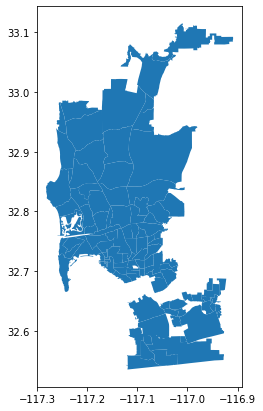

In [101]:
#plot neighbourhood map
f, ax = plt.subplots(1, figsize=(7, 7))
ax = gdf.plot(ax=ax)
plt.show()

## Explore the Data

### Amenities

In [102]:
#remembering from data wrangling notebook, convert amenities from string to list
amenities = []
for i in listings.amenities.index:
    amenities.insert(i, ast.literal_eval(listings.amenities[i]))
listings.amenities = amenities

In [112]:
#create a list of all amenities options - to use as column name for amenities dummies data
flat_amen=[]
for elem in amenities:
    amen_cols.extend(elem)
amen_cols = list(set(amen_cols))
amen_cols

['Hair Food shampoo',
 'Small electric oven oven',
 "Chef's kitchen",
 'Outdoor furniture',
 '40" HDTV',
 'Bidet',
 'Hot tub',
 'Wifi – 60 Mbps',
 'sonos  Bluetooth sound system',
 '40" TV',
 'Host greets you',
 'Beautiful vintage stove an oven in perfect working condition.  oven',
 'Whirlpool stainless steel oven',
 'Shared garden or backyard',
 'Wifi – 500 Mbps',
 'Cooking basics',
 'Free dryer–In unit',
 '55" HDTV with Amazon Prime Video, Netflix, Roku, Chromecast',
 'Stainless steel induction stove',
 'Dr. Bronner’s - Organic Sugar Soap (Peppermint) - Made with Organic Oils, Sugar and Shikakai Powder, 4-in-1 Uses: Hands, Body, Face and Hair, Cleanses, Moisturizes and Nourishes, Vegan shampoo',
 'Electric stove',
 'Babysitter recommendations',
 'ivory body soap',
 'Paid washer–In unit',
 'HDTV with Netflix, HBO Max, Amazon Prime Video',
 'PAYA body soap',
 '36" HDTV with Netflix, Amazon Prime Video, Roku',
 'Frigidair stainless steel electric stove',
 'Sonos Bluetooth sound system',